In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import arff
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Dropout, Activation
from sklearn.preprocessing import Normalizer
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [158]:
#Load the data from given path
#Change the path for running the code
path="C:/Users/HP/Documents/CyberProject/archive/nsl-kdd/"
dataOrignal=pd.read_csv(path+"KDDTrain+.txt")
dataval=pd.read_csv(path+"KDDTest-21.txt")



In [162]:
len(dataOrignal[''].unique())

22

COLUMN VALUES

@relation 'KDDTrain-20Percent'
@attribute 'duration' real
@attribute 'protocol_type' {'tcp','udp', 'icmp'} 
@attribute 'service' {'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'IRC', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois', 'X11', 'Z39_50'} 
@attribute 'flag' { 'OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH' }
@attribute 'src_bytes' real
@attribute 'dst_bytes' real
@attribute 'land' {'0', '1'}
@attribute 'wrong_fragment' real
@attribute 'urgent' real
@attribute 'hot' real
@attribute 'num_failed_logins' real
@attribute 'logged_in' {'0', '1'}
@attribute 'num_compromised' real
@attribute 'root_shell' real
@attribute 'su_attempted' real
@attribute 'num_root' real
@attribute 'num_file_creations' real
@attribute 'num_shells' real
@attribute 'num_access_files' real
@attribute 'num_outbound_cmds' real
@attribute 'is_host_login' {'0', '1'}
@attribute 'is_guest_login' {'0', '1'}
@attribute 'count' real
@attribute 'srv_count' real
@attribute 'serror_rate' real
@attribute 'srv_serror_rate' real
@attribute 'rerror_rate' real
@attribute 'srv_rerror_rate' real
@attribute 'same_srv_rate' real
@attribute 'diff_srv_rate' real
@attribute 'srv_diff_host_rate' real
@attribute 'dst_host_count' real
@attribute 'dst_host_srv_count' real
@attribute 'dst_host_same_srv_rate' real
@attribute 'dst_host_diff_srv_rate' real
@attribute 'dst_host_same_src_port_rate' real
@attribute 'dst_host_srv_diff_host_rate' real
@attribute 'dst_host_serror_rate' real
@attribute 'dst_host_srv_sdst_host_rerror_rateerror_rate' real
@attribute '' real
@attribute 'dst_host_srv_rerror_rate' real
@attribute 'class' {'normal', 'anomaly'}

In [141]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])


In [159]:
#Set the columns from the columns list
dataOrignal.columns=columns

In [139]:
dataOrignal.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [120]:
#Convert non numerical values into categorical integers
data= dataOrignal.apply(lambda x: pd.Categorical(x).codes if x.dtype == 'object' else x)

In [121]:
data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,11,15
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,9,19
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,11,21
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,11,21
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,9,21


In [122]:
#Check for empty data
print(data.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [123]:
#EDA (Exploratory data analysis on the data)
data.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
count,125972.000000,125972.000000,125972.000000,125972.00000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,1.053202,31.226558,6.97998,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,...,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,10.625480,19.504056
std,2604.525522,0.426621,16.346504,2.68937,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,...,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.636094,2.291512
min,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,5.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,18.000000
50%,0.000000,1.000000,24.000000,9.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,20.000000
75%,0.000000,1.000000,49.000000,9.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,11.000000,21.000000
max,42908.000000,2.000000,69.000000,10.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,21.000000


In [124]:
#Get variance of the data 
data.var()

duration                       6.783553e+06
protocol_type                  1.820057e-01
service                        2.672082e+02
flag                           7.232708e+00
src_bytes                      3.446106e+13
dst_bytes                      1.617073e+13
land                           1.984190e-04
wrong_fragment                 6.427796e-02
urgent                         2.063844e-04
hot                            4.622401e+00
num_failed_logins              2.046596e-03
logged_in                      2.391315e-01
num_compromised                5.732259e+02
root_shell                     1.339779e-03
su_attempted                   2.038935e-03
num_root                       5.953461e+02
num_file_creations             2.341950e-01
num_shells                     4.920064e-04
num_access_files               9.874387e-03
num_outbound_cmds              0.000000e+00
is_host_login                  7.938272e-06
is_guest_login                 9.334015e-03
count                          1

In [125]:
#Dropping the columns with Super low variance
to_drop_Columns1=['num_outbound_cmds',
'is_host_login', 'level']

In [126]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,9,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,9,20
125968,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,11,21
125969,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,11,18
125970,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,20


In [127]:
data=data.drop(to_drop_Columns1, axis=1)
#Separate X and Y
X=data.drop('attack',axis=1)
# Y is the attack column which specifies what type of attack is 
y=data['attack']

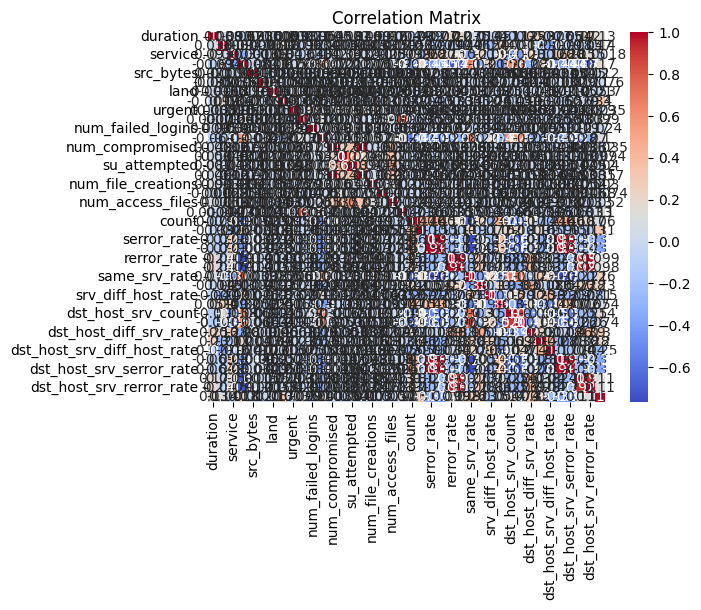

In [83]:
#Plot correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [130]:
#Total types of attacks
print(X.shape)

(125972, 39)


In [129]:
dataOrignal['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [131]:
#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=42)


In [143]:
dataval= dataval.apply(lambda x: pd.Categorical(x).codes if x.dtype == 'object' else x)
dataval.head()
dataval.columns=columns
dataval=dataval.drop(to_drop_Columns1,axis=1)



In [144]:
X_val=dataval.drop('attack',axis=1)
y_val=dataval['attack']

In [145]:
#Create the DecisionTreeClassifier from sklearn
Decisionclf = DecisionTreeClassifier(random_state=42)
Decisionclf.fit(X_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = Decisionclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9969041476483429


In [146]:
y_pred2 = Decisionclf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred2)
accuracy

0.06911975694151405

In [102]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

# Predict labels on test data
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9984520738241714


In [103]:
y_pred2 = rfc.predict(X_val)
accuracy = accuracy_score(y_val, y_pred2)
accuracy

0.08346695923706642

In [293]:
#intialize Linear SVC and wrap the onevsREst classifier to use for multilabel classification
clf_onevsRest = LinearSVC(random_state=0)
clf_onevsRest1 = OneVsRestClassifier(clf_onevsRest)
clf_onevsRest1.fit(X_train, y_train)

# Predict on test set and calculate accuracy
y_pred = clf_onevsRest1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9900773963087914


In [296]:
GClassifier = GaussianNB()
GClassifier.fit(X_train, y_train)

# Predict on test set and calculate accuracy
y_pred = GClassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.4637824965270887


In [155]:
len(dataOrignal['attack'].unique())

23

In [109]:
#Normalize the X input variables for neural networks

scaler = Normalizer().fit(X)
normalized_X = scaler.transform(X)
normalized_X.shape
#One hot encode the y variables
y_onehot = to_categorical(y, num_classes=23)

In [114]:
scaler = Normalizer().fit(dataval.drop(['attack'],axis=1))
val_X = scaler.transform(dataval.drop(['attack'],axis=1))
val_X.shape
#One hot encode the y variables
val_y = to_categorical(dataval['attack'], num_classes=23)

IndexError: index 29 is out of bounds for axis 1 with size 23

In [110]:
X_normalized_reshaped = np.reshape(X, (X.shape[0], 1, X.shape[1]))
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_normalized_reshaped, y_onehot, test_size=0.2, random_state=42)
X_train2.shape

(100777, 1, 39)

In [111]:
y_train2.shape

(100777, 23)

In [113]:
#Build single layer LSTM model
model = Sequential()
model.add(LSTM(units=39,input_dim=39,activation='relu'))  
model.add(Dropout(0.1))
model.add(Dense(23,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 39)                12324     
                                                                 
 dropout_1 (Dropout)         (None, 39)                0         
                                                                 
 dense_1 (Dense)             (None, 23)                920       
                                                                 
Total params: 13,244
Trainable params: 13,244
Non-trainable params: 0
_________________________________________________________________


In [252]:
# Compile the LSTM model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train by giving epochs=50 and batch_size=64
history = model.fit(X_train2, y_train2, epochs=20, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test2, y_test2)
loss2,accuracy2=model.evaluate(X_test2, y_test2)
# Predict on new data
print(accuracy)

Epoch 1/20
315/315 [==============================] - 8s 8ms/step - loss: 88.0060 - accuracy: 0.4549
Epoch 2/20
315/315 [==============================] - 2s 7ms/step - loss: 68.3032 - accuracy: 0.8433
Epoch 3/20
315/315 [==============================] - 2s 6ms/step - loss: 30.1400 - accuracy: 0.8798
Epoch 4/20
315/315 [==============================] - 2s 7ms/step - loss: 25.3421 - accuracy: 0.8918
Epoch 5/20
315/315 [==============================] - 2s 5ms/step - loss: 7.1529 - accuracy: 0.9034
Epoch 6/20
315/315 [==============================] - 2s 6ms/step - loss: 34.8718 - accuracy: 0.9082
Epoch 7/20
315/315 [==============================] - 2s 5ms/step - loss: 40.4840 - accuracy: 0.9068
Epoch 8/20
315/315 [==============================] - 2s 5ms/step - loss: 22.5608 - accuracy: 0.8751
Epoch 9/20
315/315 [==============================] - 2s 7ms/step - loss: 10.5815 - accuracy: 0.8823
Epoch 10/20
315/315 [==============================] - 2s 5ms/step - loss: 28.5776 - accurac

Text(0.5, 1.0, 'Loss vs Epoch Graph')

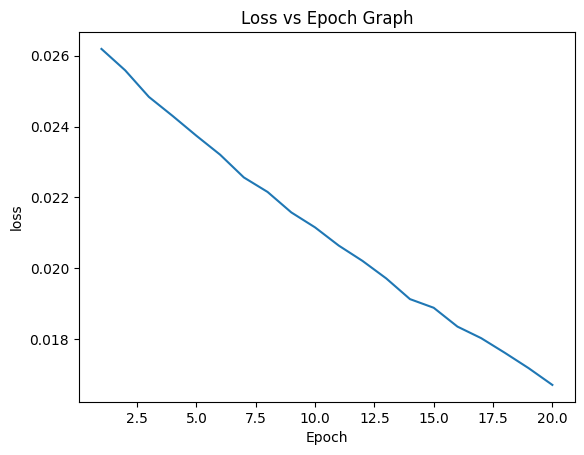

In [146]:
#Get all the loses in the loss vs epoch graph
losses = history.history['loss']
epochs=[i for i in range(1,21)]
plt.plot( epochs , losses )
plt.xlabel( 'Epoch' )
plt.ylabel('loss')
plt.title('Loss vs Epoch Graph')

Text(0.5, 1.0, 'Accuracy vs Epoch Graph')

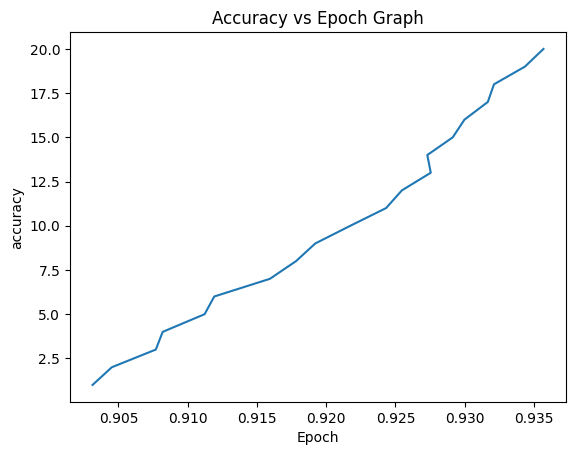

In [148]:
accuracies = history.history['accuracy']
epochs=[i for i in range(1,21)]
plt.plot( accuracies , epochs )
plt.xlabel( 'Epoch' )
plt.ylabel('accuracy')
plt.title('Accuracy vs Epoch Graph')

In [152]:
#Build a double layer LSTM model
model2 = Sequential()
model2.add(LSTM(units=39,input_dim=39,activation='relu', return_sequences=True))  
model2.add(Dropout(0.1))
model2.add(LSTM(units=39, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(22,activation="softmax"))
model2.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, None, 42)          14280     
                                                                 
 dropout_40 (Dropout)        (None, None, 42)          0         
                                                                 
 lstm_55 (LSTM)              (None, 42)                14280     
                                                                 
 dropout_41 (Dropout)        (None, 42)                0         
                                                                 
 dense_50 (Dense)            (None, 22)                946       
                                                                 
Total params: 29,506
Trainable params: 29,506
Non-trainable params: 0
_________________________________________________________________


In [154]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X_train2, y_train2, epochs=20, batch_size=64)
loss, accuracy = model2.evaluate(X_test2, y_test2)

# Predict on new data
print(accuracy)

Epoch 1/20
315/315 [==============================] - 8s 6ms/step - loss: 0.0226 - accuracy: 0.9754
Epoch 2/20
315/315 [==============================] - 2s 6ms/step - loss: 0.1968 - accuracy: 0.9689
Epoch 3/20
315/315 [==============================] - 2s 6ms/step - loss: 0.0287 - accuracy: 0.9729
Epoch 4/20
315/315 [==============================] - 2s 7ms/step - loss: 0.1099 - accuracy: 0.9715
Epoch 5/20
315/315 [==============================] - 2s 6ms/step - loss: 0.0107 - accuracy: 0.9723
Epoch 6/20
315/315 [==============================] - 2s 6ms/step - loss: 0.2318 - accuracy: 0.9739
Epoch 7/20
315/315 [==============================] - 2s 6ms/step - loss: 0.0219 - accuracy: 0.9737
Epoch 8/20
315/315 [==============================] - 2s 6ms/step - loss: 0.0104 - accuracy: 0.9735
Epoch 9/20
315/315 [==============================] - 2s 6ms/step - loss: 0.0086 - accuracy: 0.9737
Epoch 10/20
315/315 [==============================] - 2s 6ms/step - loss: 0.0081 - accuracy: 0.9767

In [305]:
dataOrignal[:0]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level


In [319]:

#Test on a new value
test_list=[0,'tcp','private','S0',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.00,1.00,0.00,0.00,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,'neptune',21]

df = pd.DataFrame([test_list], columns=columns)
testdata= df.apply(lambda x: pd.Categorical(x).codes if x.dtype == 'object' else x)
testdata=testdata.drop(to_drop_Columns1,axis=1)
testdata=testdata.drop('attack',axis=1)
y_pred = Decisionclf.predict(testdata)
y_pred

array([9], dtype=int8)